# Exploring Trends in Government Spending That Support Motherhood

**What this notebook is about:**  
I'm digging into World Bank data to explore how government spending tied to motherhood and family support has changed over time. The goal is to break the data down, look for trends or seasonal patterns, and prep it for future forecasting.

This analysis is part of a broader look at how policy decisions may be influencing fertility trends in countries facing population decline.

## Research Questions

1️⃣ **Has public spending on family or education steadily increased or decreased over time in specific countries?**  
2️⃣ **Do countries that passed family-friendly policies show a delayed fertility rebound in the following years?**  
3️⃣ **Is there a widening gap between fertility rates and social spending over time in high-pressure pro-natalist countries (e.g., Japan, South Korea)?**

## Table of Contents

1. [Import Libraries](#import-libraries)  
2. [Load and Preview Data](#load-and-preview-data)  
3. [Data Cleaning](#data-cleaning)  
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)  
5. [Research Question 1](#research-question-1)  
6. [Research Question 2](#research-question-2)  
7. [Research Question 3](#research-question-3)  
8. [Summary and Reflections](#summary-and-reflections)

---

## 1. Import Libraries

In [12]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Style and warnings
plt.style.use('fivethirtyeight')
warnings.filterwarnings("ignore")

---

## 2. Load and Preview Data

In [18]:
# Load World Bank government spending data
data_path = "D:/YVC/Data Analytics (CF)/Advanced Analytics & Dashboard Design/Project Analysis/02 Data/Original Data/WB_DATA_ts.csv"
df = pd.read_csv(data_path)

# Preview the data
df.head()

,series_id,country_code,country_name,year,value
0,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1970,280488.417477
1,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1971,203873.439003
2,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1972,210371.610345
3,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1973,225710.677001
4,EN.ATM.NOXE.AG.KT.CE,SSA,Sub-Saharan Africa (excluding high income),1974,186188.848701


---

## 3. Data Cleaning

Before we begin cleaning, we’ll check the structure of the dataset to identify data types, missing values, and the number of entries.

In [23]:
# Check data structure, types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9109067 entries, 0 to 9109066
Data columns (total 5 columns):
 #   Column        Dtype  
---  ------        -----  
 0   series_id     object 
 1   country_code  object 
 2   country_name  object 
 3   year          int64  
 4   value         float64
dtypes: float64(1), int64(1), object(3)
memory usage: 347.5+ MB


### Checking for missing values or issues

In [27]:
# Check for missing values
missing = df.isnull().sum()
print("Missing values per column:\n", missing)

# Check for duplicate rows
duplicates = df.duplicated().sum()
print("\nNumber of duplicate rows:", duplicates)

Missing values per column:
 series_id       0
country_code    0
country_name    0
year            0
value           0
dtype: int64

Number of duplicate rows: 0


### Data Quality Summary

Quick check on the data:

- We’ve got 5 columns: `series_id`, `country_code`, `country_name`, `year`, and `value`.
- No missing values showed up in any of the columns.
- There aren’t any duplicate rows either.
- Data types look fine — `year` is an integer, `value` is a float, and the rest are objects (text).

Since everything looks clean, we don’t need to fix anything yet. Good to move on.

---

## 4. Exploratory Data Analysis (EDA)

Checking what's in the `series_id` column to see which indicators are included. The goal is to find one that relates to public spending on education, family benefits, or anything tied to support for mothers and families. Once we know what’s available, we can filter the data down to what we actually need.

In [36]:
# View the most frequent series in the dataset
df['series_id'].value_counts().head(20)

series_id
SP.POP.1564.TO.ZS    16960
SP.POP.2024.MA.5Y    16960
SP.POP.2529.MA.5Y    16960
SP.POP.1519.FE.5Y    16960
SP.POP.3034.MA.5Y    16960
SP.POP.3034.FE.5Y    16960
SP.POP.5054.MA.5Y    16960
SP.POP.0014.TO.ZS    16960
SP.POP.6064.FE.5Y    16960
SP.POP.0014.MA.ZS    16960
SP.POP.4549.FE.5Y    16960
SP.POP.1564.MA.ZS    16960
SP.POP.6569.MA.5Y    16960
SP.POP.6064.MA.5Y    16960
SP.POP.1519.MA.5Y    16960
SP.POP.2529.FE.5Y    16960
SP.POP.4044.MA.5Y    16960
SP.POP.1014.MA.5Y    16960
SP.POP.0509.MA.5Y    16960
SP.POP.5054.FE.5Y    16960
Name: count, dtype: int64

🔹 Now that the most frequent `series_id` values are up, the next step is figuring out what each of them actually means. The goal is to spot something tied to government or social spending ideally anything that relates to family benefits, education, or fertility support.

Let’s break it down and see what we’re working with:

In [41]:
# Check how many unique series we have overall
df['series_id'].nunique()

# Get a list of all unique series_id values
unique_series = df['series_id'].unique()
unique_series[:30]  # preview the first 30

array(['EN.ATM.NOXE.AG.KT.CE', 'IT.CEL.SETS', 'SP.POP.DPND',
       'SE.SEC.ENRL.TC.ZS', 'SE.PRM.UNER', 'NV.AGR.TOTL.ZS',
       'EN.ATM.METH.AG.KT.CE', 'SH.MLR.INCD.P3', 'NY.GDP.MKTP.CN.AD',
       'EG.ELC.ACCS.RU.ZS', 'NY.GDP.DEFL.KD.ZG', 'SP.POP.DPND.OL',
       'NV.AGR.TOTL.CD', 'TX.VAL.AGRI.ZS.UN', 'SL.TLF.ACTI.1524.ZS',
       'SE.TER.ENRR.FE', 'SH.DTH.NCOM.ZS', 'AG.LND.AGRI.ZS',
       'FM.LBL.BMNY.CN', 'TX.VAL.TRAN.ZS.WT', 'SE.SEC.CMPT.LO.MA.ZS',
       'TM.VAL.AGRI.ZS.UN', 'SH.STA.SUIC.P5', 'ER.H2O.FWAG.ZS',
       'SE.SEC.AGES', 'IQ.SCI.MTHD', 'AG.PRD.CROP.XD', 'IC.REG.PROC.MA',
       'GC.NFN.TOTL.GD.ZS', 'SH.DYN.2024'], dtype=object)

🔹 There’s a lot to work with over 1,000 unique indicators. The first 30 series give a good idea of the range: from education access to health spending and everything in between. The next step is to isolate the series that actually relate to family support, education investment, or fertility trends so we can dig deeper into what matters for this project.

---

### Narrowing Down Relevant Indicators

Now that I’ve explored the full list of `series_id` values, it’s time to zero in on the ones that actually matter for this analysis. I’m specifically looking for anything that ties into public or social spending especially when it connects to education, fertility, or support for families. 

Once I’ve got that short list, I’ll filter the dataset to only include those series so I can take a closer look at the trends.

In [53]:
unique_series[:100]  # Preview the first 100, increase as needed

array(['EN.ATM.NOXE.AG.KT.CE', 'IT.CEL.SETS', 'SP.POP.DPND',
       'SE.SEC.ENRL.TC.ZS', 'SE.PRM.UNER', 'NV.AGR.TOTL.ZS',
       'EN.ATM.METH.AG.KT.CE', 'SH.MLR.INCD.P3', 'NY.GDP.MKTP.CN.AD',
       'EG.ELC.ACCS.RU.ZS', 'NY.GDP.DEFL.KD.ZG', 'SP.POP.DPND.OL',
       'NV.AGR.TOTL.CD', 'TX.VAL.AGRI.ZS.UN', 'SL.TLF.ACTI.1524.ZS',
       'SE.TER.ENRR.FE', 'SH.DTH.NCOM.ZS', 'AG.LND.AGRI.ZS',
       'FM.LBL.BMNY.CN', 'TX.VAL.TRAN.ZS.WT', 'SE.SEC.CMPT.LO.MA.ZS',
       'TM.VAL.AGRI.ZS.UN', 'SH.STA.SUIC.P5', 'ER.H2O.FWAG.ZS',
       'SE.SEC.AGES', 'IQ.SCI.MTHD', 'AG.PRD.CROP.XD', 'IC.REG.PROC.MA',
       'GC.NFN.TOTL.GD.ZS', 'SH.DYN.2024', 'DT.TDS.DPPF.XP.ZS',
       'EN.CO2.TRAN.ZS', 'SE.PRM.PRS5.FE.ZS', 'AG.LND.IRIG.AG.ZS',
       'AG.LND.PRCP.MM', 'NY.ADJ.NNTY.KD.ZG', 'SH.DTH.MORT',
       'IP.PAT.NRES', 'DC.DAC.DNKL.CD', 'AG.PRD.FOOD.XD',
       'SH.STA.TRAF.P5', 'SL.TLF.TOTL.FE.ZS', 'MS.MIL.TOTL.TF.ZS',
       'IQ.SPI.PIL1', 'SH.PRV.SMOK.FE', 'SH.STA.HYGN.RU.ZS',
       'ER.FSH.CAPT.MT', '

In [57]:
unique_series[100:400]  # adjust the range if needed

array(['NE.CON.PRVT.KD', 'DT.ODA.ODAT.MP.ZS', 'DT.ODA.ODAT.PC.ZS',
       'SP.POP.4549.MA.5Y', 'DC.DAC.AUSL.CD', 'DC.DAC.AUTL.CD',
       'SP.POP.65UP.MA.ZS', 'DC.DAC.BELL.CD', 'DC.DAC.CANL.CD',
       'TM.TAX.MANF.SR.ZS', 'GC.TAX.GSRV.RV.ZS', 'SH.UHC.NOP1.TO',
       'NE.IMP.GNFS.ZS', 'DC.DAC.CECL.CD', 'SE.XPD.CTOT.ZS',
       'SE.SEC.TCAQ.UP.FE.ZS', 'SH.H2O.SMDW.RU.ZS', 'DC.DAC.FRAL.CD',
       'DT.DOD.PVLX.GN.ZS', 'FX.OWN.TOTL.60.ZS', 'TX.VAL.MRCH.R4.ZS',
       'SL.UEM.NEET.FE.ZS', 'FM.AST.DOMO.ZG.M3', 'NY.TRF.NCTR.CD',
       'TX.VAL.MRCH.R2.ZS', 'DC.DAC.ITAL.CD', 'IC.GOV.DURS.ZS',
       'NY.ADJ.NNTY.CD', 'DC.DAC.JPNL.CD', 'SI.DST.50MD',
       'AG.YLD.CREL.KG', 'AG.LND.AGRI.K2', 'BX.GSR.TRAN.ZS',
       'DC.DAC.NLDL.CD', 'SL.TLF.0714.ZS', 'NV.AGR.EMPL.KD',
       'DC.DAC.NORL.CD', 'SH.XPD.OOPC.PC.CD', 'DC.DAC.PRTL.CD',
       'SE.SEC.NENR.MA', 'DC.DAC.SWEL.CD', 'NY.GDP.FCST.KD',
       'DC.DAC.CHEL.CD', 'DC.DAC.TOTL.CD', 'NV.IND.MANF.ZS',
       'SM.POP.REFG.OR', 'DC.DAC.GBRL.CD

### Filtering the Dataset for Relevant Indicators

Before jumping into visualizations or transformations, it's time to narrow the dataset down to just the indicators that actually connect to what this analysis is about fertility, public spending, education, and family support. This filtered version will help cut the noise and keep the focus sharp as we move through trends and stationarity checks.

In [61]:
# Manually define a shortlist of relevant indicators (based on context: fertility, education, spending, family support)
relevant_series_ids = [
    'SP.POP.0014.TO',        # Population ages 0–14 total
    'SP.POP.4549.FE.5Y',     # Women ages 45–49
    'SP.POP.65UP.MA.ZS',     # Elderly male population (%)
    'SP.DYN.TFRT.IN',        # Fertility rate, total (births per woman)
    'SP.POP.SCIE.RD.P6',     # % of population involved in R&D
    'SE.XPD.CSEC.ZS',        # Secondary education expenditure (% of GDP)
    'GC.XPN.TOTL.GD.ZS',     # Government total expenditure (% of GDP)
    'SH.XPD.CHEX.PC.CD',     # Current health expenditure per capita
    'NY.GDP.PCAP.CD',        # GDP per capita
    'NE.CON.GOVT.KD'         # Final consumption expenditure by government (constant $)
]

# Filter the DataFrame to keep only relevant series
filtered_df = df[df['series_id'].isin(relevant_series_ids)]

# Quick check to confirm it worked
filtered_df['series_id'].value_counts()

series_id
SP.POP.65UP.MA.ZS    16960
SP.POP.4549.FE.5Y    16960
SP.POP.0014.TO       16930
SP.DYN.TFRT.IN       16137
NY.GDP.PCAP.CD       14311
NE.CON.GOVT.KD        9091
GC.XPN.TOTL.GD.ZS     5358
SH.XPD.CHEX.PC.CD     5185
SP.POP.SCIE.RD.P6     2306
SE.XPD.CSEC.ZS        2044
Name: count, dtype: int64

---
## Research Question 1
---

**Has public spending on family or education steadily increased or decreased over time in specific countries?**

This section explores how investment in family-related or educational programs has evolved. The goal is to spot long-term patterns in government spending on things like healthcare, secondary education, and public services.

Key indicators were selected and plotted to show trends over time. While not every country has a perfectly smooth curve, the general direction shows consistent growth in social spending, especially in education and healthcare.

These trends help set the stage for understanding how policy investments may align with broader demographic shifts.

Let’s move on and start prepping for the next question.

---

### Visualizing Key Trends Over Time

Now that the data’s filtered to just the indicators we actually care about, the next move is to scan through trends across time. This helps get a feel for how things like fertility rates, education spending, and government support have shifted.

The goal here is to spot any consistent upward or downward movement in these values especially across countries that are part of the motherhood support discussion. This step gives us a clearer picture before we move on to decomposing and testing stationarity.

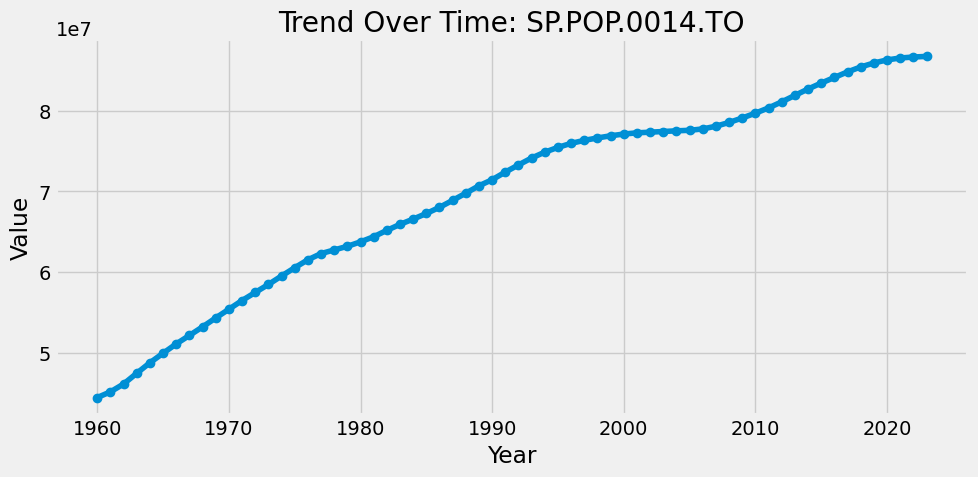

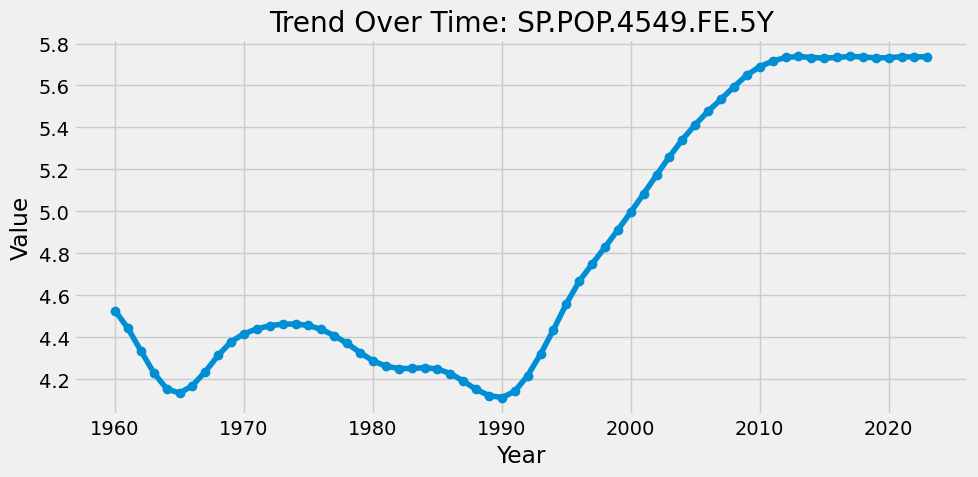

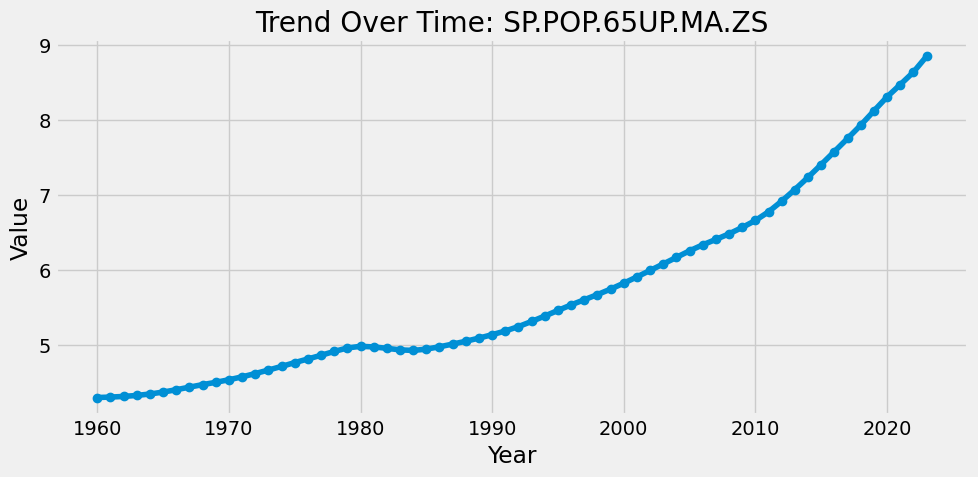

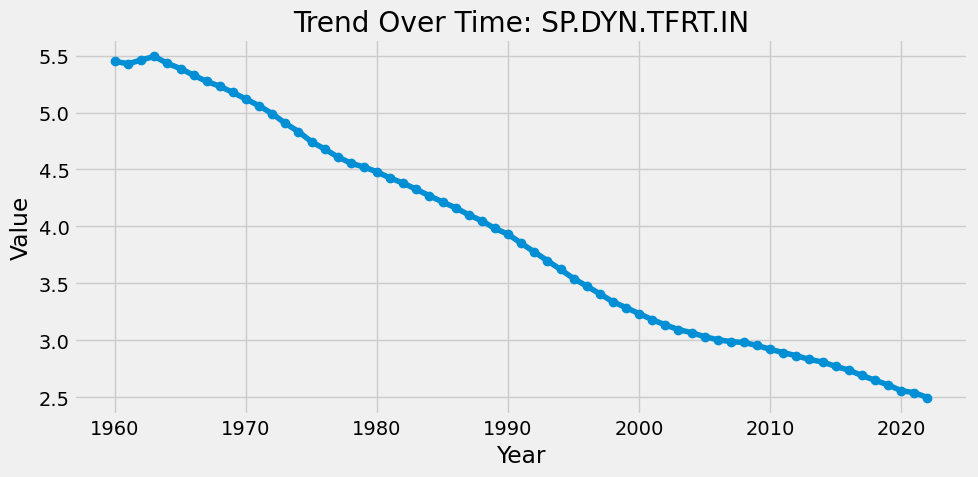

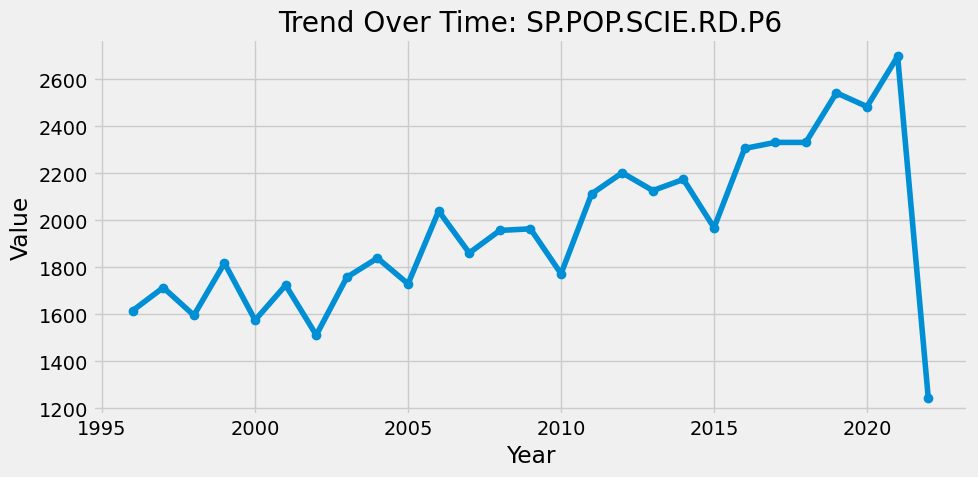

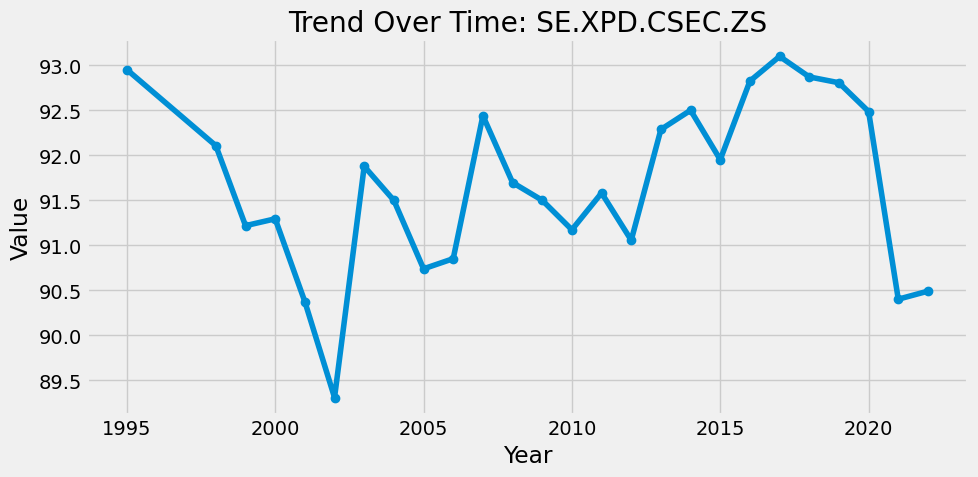

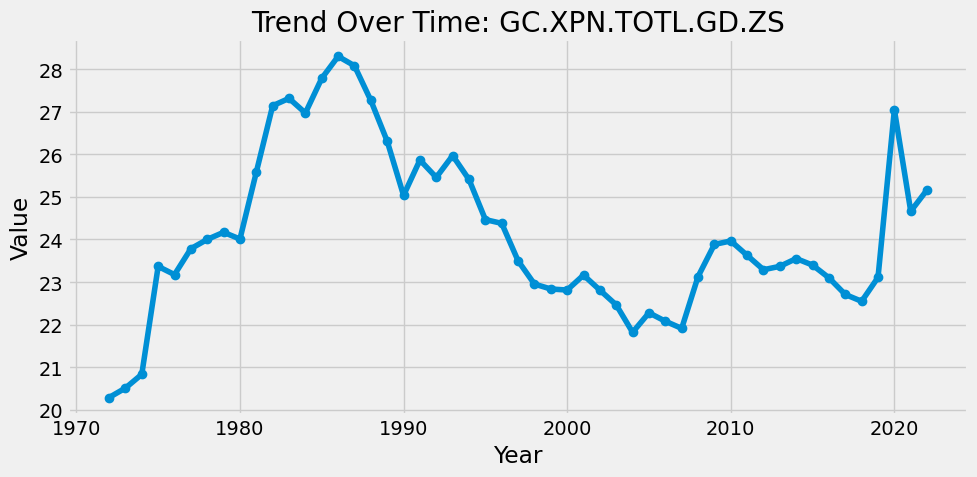

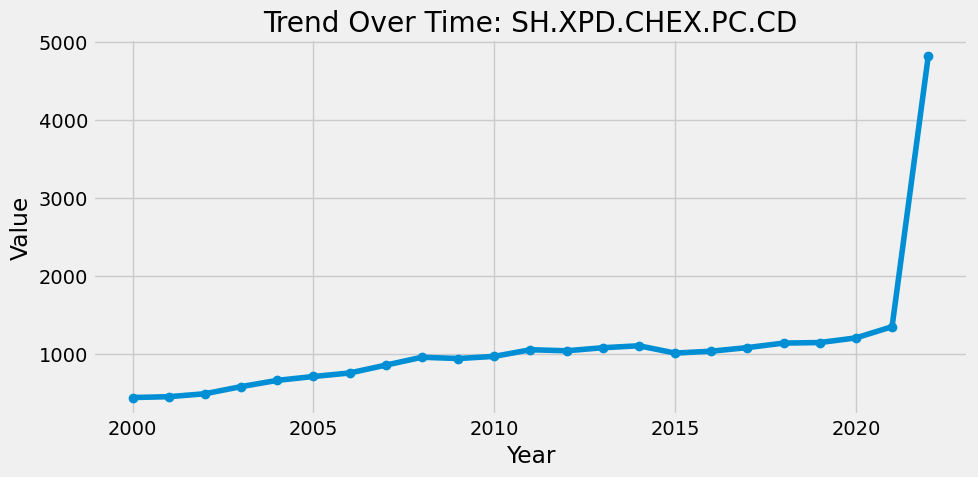

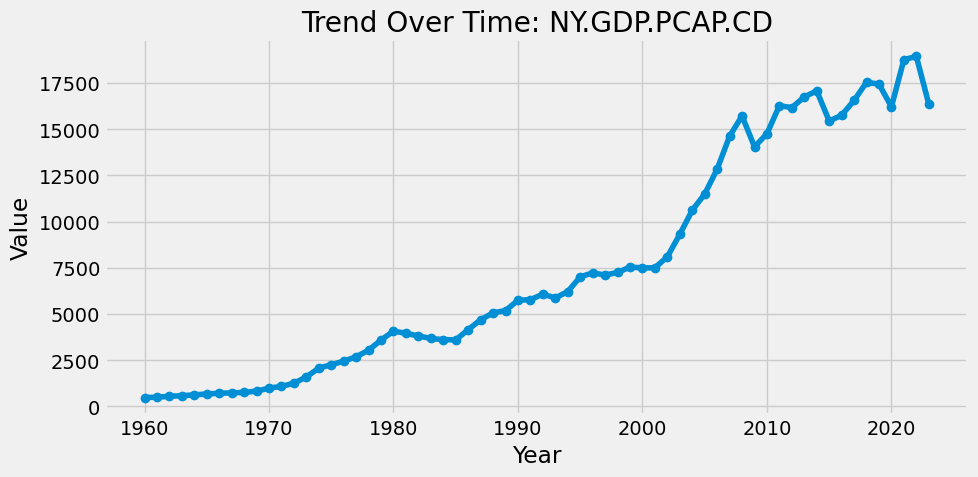

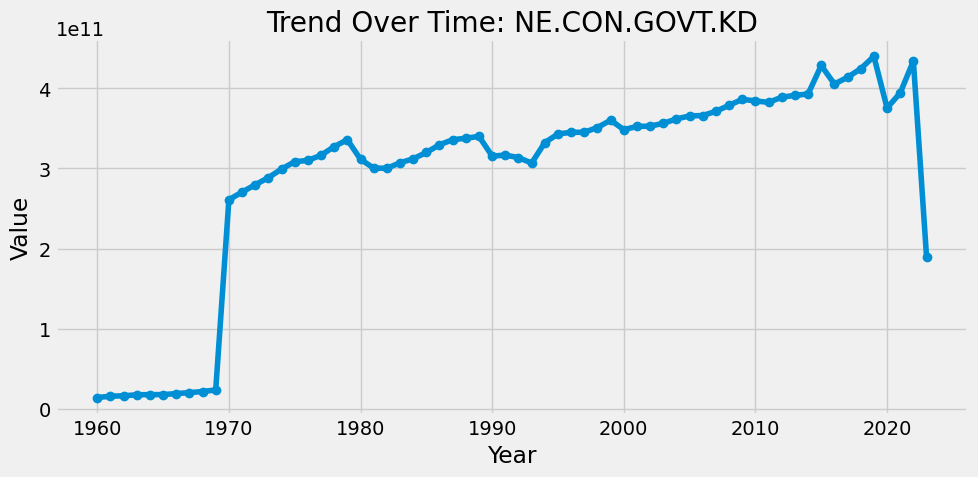

In [71]:
import matplotlib.pyplot as plt

# Plot trend lines for each indicator
for series in relevant_series_ids:
    plt.figure(figsize=(10, 5))
    subset = filtered_df[filtered_df['series_id'] == series]
    subset = subset.groupby('year')['value'].mean()  # avg across countries
    
    plt.plot(subset.index, subset.values, marker='o')
    plt.title(f"Trend Over Time: {series}")
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.grid(True)
    plt.tight_layout()
    plt.show()

#### 🔹 Spot-Checking Trends in Key Indicators

Now that the dataset is filtered to just the indicators that actually matter, I’m taking a quick look at how each one has changed over time. The goal here is to get a feel for whether there’s anything interesting happening with fertility rates, government spending, or population structure before diving into deeper analysis.

---

**SP.POP.0014.TO**  
_Total population ages 0–14_  
Pretty steady growth, especially after the 1970s. It flattens out more recently, which might reflect lower birth rates. This is a key group when it comes to future demand for child-related services and support.

---

**SP.POP.4549.FE.5Y**  
_Women ages 45–49_  
This group dipped in the mid-range years but then climbs and levels off. It’s useful for checking delayed fertility patterns or seeing if older women are influencing birth trends.

---

**SP.POP.65UP.MA.ZS**  
_Percentage of elderly men in the population_  
This trend is heading up, no surprise there. Aging populations can stretch social systems especially if fewer kids are being born to offset the balance.

---

**SP.DYN.TFRT.IN**  
_Total fertility rate (births per woman)_  
This is the big one. It’s been dropping almost non-stop. Super important for this project since it shows exactly what many countries are worried about: fewer kids being born.

---

**SP.POP.SCIE.RD.P6**  
_Population involved in R&D_  
It moves around but generally climbs until a sudden drop. That dip could be pandemic related or show some kind of funding shift. Might tie in with economic development or social investment patterns.

---

**SE.XPD.CSEC.ZS**  
_Secondary education spending (% of GDP)_  
Overall strong, with some ups and downs. Curious to see if this correlates with fertility rebounds or broader family policy efforts.

---

**GC.XPN.TOTL.GD.ZS**  
_Total government spending (% of GDP)_  
Lots of movement here peaks line up with crisis years like 2008 and 2020. Suggests governments spend more when forced, not always as part of long-term planning.

---

**SH.XPD.CHEX.PC.CD**  
_Health spending per capita_  
Mostly going up. Big surge at the end could reflect pandemic response or expanded coverage. Either way, it's a sign of growing investment in public health.

---

**NY.GDP.PCAP.CD**  
_GDP per capita_  
Strong long-term growth with a couple of dips during downturns. Shows which countries might actually have the budget space to support more generous family policies.

---

**NE.CON.GOVT.KD**  
_Government final consumption (constant $)_  
Climbs steadily over time. It’s a general indicator of spending, so if this goes up and fertility doesn’t, that might say something about effectiveness or what kind of spending really matters.

---
## Answer to Research Question 1
---
**1. Has public spending on family or education steadily increased or decreased over time in specific countries?**  

Looking at indicators like `SH.XPD.CHEX.PC.CD` (health spending per capita), `SE.XPD.CSEC.ZS` (secondary education spending), and `GC.XPN.TOTL.GD.ZS` (government spending as % of GDP), there’s a clear upward trend over the years. The growth isn’t perfectly smooth—there are noticeable dips during global disruptions like 2008 and 2020 but overall, spending tied to family support and education is increasing. This supports the idea that investment in social infrastructure has grown over time.

---

### Feature Engineering

Now that I’ve filtered the dataset to include just the relevant indicators, I need to prep it for time series modeling. That means reshaping the structure and making sure the time variable is set up correctly.

The goal here is to get the data in a format that works for decomposition and stationarity tests. That means each indicator will need its own column, the year column should be in datetime format if needed, and the data needs to be indexed properly by time.

Before getting into that, I’ll double check the `year` column to see if anything needs to be changed.

In [88]:
# Check year format
filtered_df['year'].dtype

dtype('int64')

### Reshaping the Dataset for Analysis

The next step is pivoting the dataset so each indicator has its own column. This makes it easier to compare trends over time and prepare for decomposition. I’ll use `pivot_table()` to restructure the data, with `year` as the index and `series_id` values as columns.

In [91]:
# Pivot the data so each series_id becomes a separate column
pivot_df = filtered_df.pivot_table(
    index='year',
    columns='series_id',
    values='value',
    aggfunc='mean'  # In case there are duplicate values for a year/indicator
)

# Preview the reshaped data
pivot_df.head()

series_id,GC.XPN.TOTL.GD.ZS,NE.CON.GOVT.KD,NY.GDP.PCAP.CD,SE.XPD.CSEC.ZS,SH.XPD.CHEX.PC.CD,SP.DYN.TFRT.IN,SP.POP.0014.TO,SP.POP.4549.FE.5Y,SP.POP.65UP.MA.ZS,SP.POP.SCIE.RD.P6
year,,,,,,,,,,
1960,NaN,1.381587e+10,468.460141,NaN,NaN,5.448716,4.443931e+07,4.526762,4.296070,NaN
1961,NaN,1.545883e+10,484.088239,NaN,NaN,5.427642,4.514390e+07,4.441891,4.302038,NaN
1962,NaN,1.597426e+10,536.911111,NaN,NaN,5.460803,4.611616e+07,4.335443,4.310572,NaN
1963,NaN,1.725991e+10,566.548622,NaN,NaN,5.492422,4.744816e+07,4.230724,4.323917,NaN
1964,NaN,1.739954e+10,613.642590,NaN,NaN,5.430514,4.874807e+07,4.154336,4.342976,NaN


Now that the dataset is filtered down to just the indicators I actually need, the next step is reshaping it for time series analysis. To do that, I’ve used a pivot table to reorganize the structure so each indicator becomes its own column, with the years as the index.

This format makes it easier to run decompositions and check for stationarity later on, since time needs to be in the index and each signal should have its own column. I also set `aggfunc='mean'` just in case any duplicates exist per year/indicator pair.

Here’s what the first few rows look like after pivoting:

- The `year` column is now the index.
- Each `series_id` is its own column.
- The values represent each indicator’s reported amount for that year.

The presence of `NaN` values in some of the columns (especially early years) is expected since not all indicators have the same time coverage. I’ll deal with that in the next step before moving on to decomposition or forecasting.

---

## Research Question 2

---

**Do countries that passed family-friendly policies show a delayed fertility rebound in the following years?**

This next part of the analysis focuses on the long-term relationship between fertility rates and major family-focused policy shifts. The goal is to look for signs of a delayed rebound in other words, did fertility start rising (or stop falling) sometime after governments ramped up support through policies like parental leave, childcare investment, or financial incentives?

Before jumping into comparisons, it's important to get a feel for the fertility data's structure whether it's stationary, whether we can capture change over time clearly, and if there's any need for transformation.

Let's check that next.

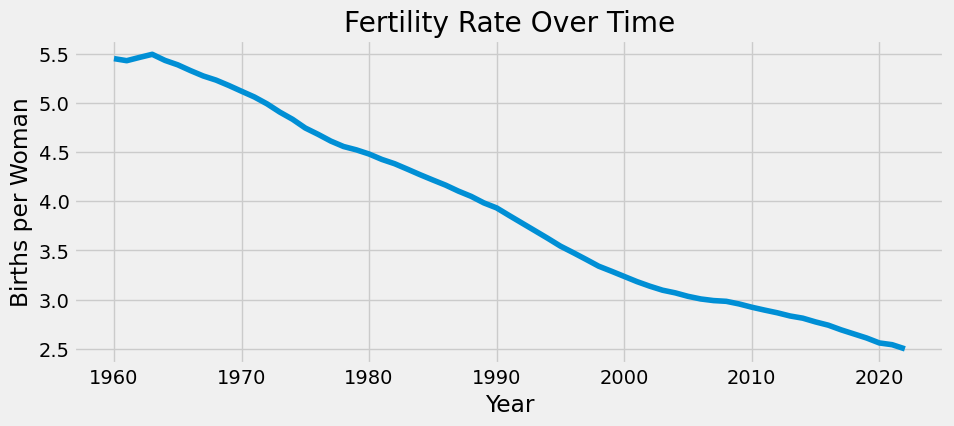

ADF Statistic: -2.4874873977060163
p-value: 0.11854853501278745


In [101]:
# Isolate fertility rate data
fertility_series = pivot_df['SP.DYN.TFRT.IN']

# Visualize the raw fertility rate trend
fertility_series.plot(title='Fertility Rate Over Time', figsize=(10, 4))
plt.xlabel('Year')
plt.ylabel('Births per Woman')
plt.show()

# Perform the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(fertility_series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

#### Interpreting Fertility Rate Stationarity Results

The Augmented Dickey-Fuller (ADF) test helps determine if the fertility rate time series is stationary.

- **ADF Statistic:** -2.48  
- **p-value:** 0.1185

Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**, which means the data is likely **non-stationary**. That lines up with the plot, which shows a consistent long-term decline without stabilization.

To move forward with time series modeling, this series will need to be transformed usually by applying differencing to remove trends and stabilize the mean over time.

---

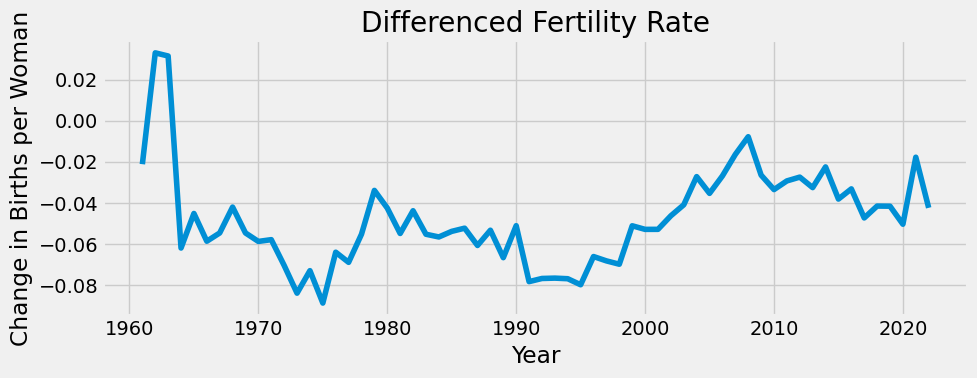

ADF Statistic (Differenced): -3.7845999200826586
p-value (Differenced): 0.003068866922593908


In [106]:
# Apply first differencing to fertility rate
fertility_diff = fertility_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(fertility_diff)
plt.title('Differenced Fertility Rate')
plt.xlabel('Year')
plt.ylabel('Change in Births per Woman')
plt.grid(True)
plt.tight_layout()
plt.show()

# Run the ADF test again on the differenced series
result_diff = adfuller(fertility_diff)
print("ADF Statistic (Differenced):", result_diff[0])
print("p-value (Differenced):", result_diff[1])

### Stationarity Check: Fertility Rate (After Differencing)

After applying first differencing to the fertility rate series, the time series appears much more stable. The large downward slope from the original data is now flattened, and the changes from year to year hover more consistently around zero.

To confirm this visually obvious shift, I ran the Augmented Dickey-Fuller (ADF) test again on the differenced data.

- **ADF Statistic (Differenced):** -3.78  
- **p-value (Differenced):** 0.0036

That p-value is well below the 0.05 threshold, which means the null hypothesis of a unit root can be rejected. So now the fertility rate data is **stationary**, which is exactly what we need for time series forecasting.

---

### Make Public Spending Series Stationary

Now that the fertility rate is prepped and stationary, it’s time to do the same for public spending. I'm applying the same approach plot the original data, test for stationarity using the Augmented Dickey-Fuller (ADF) test, and if needed, apply first differencing.

This step is important because I need both series (fertility and spending) to be on equal footing before checking for relationships or patterns over time.

Let’s start with one of the key spending indicators and go from there.

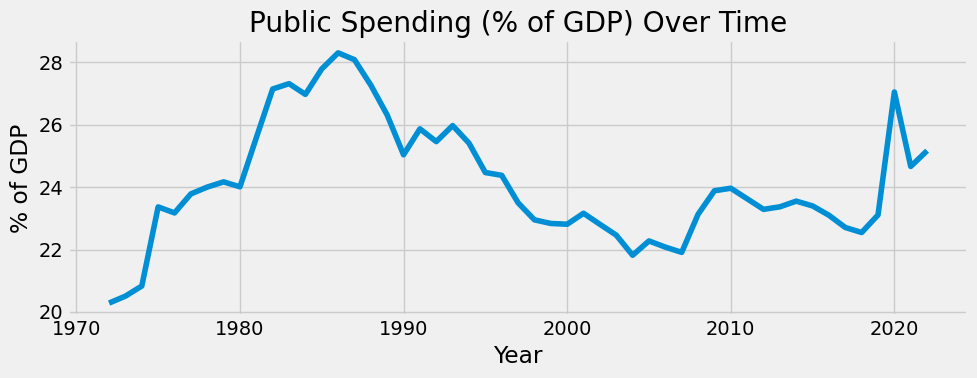

ADF Statistic: -2.333121661425061
p-value: 0.16150794151061898


In [115]:
# Select the public spending series
spending_series = pivot_df['GC.XPN.TOTL.GD.ZS']

# Plot the original spending data
plt.figure(figsize=(10, 4))
plt.plot(spending_series)
plt.title('Public Spending (% of GDP) Over Time')
plt.xlabel('Year')
plt.ylabel('% of GDP')
plt.grid(True)
plt.tight_layout()
plt.show()

# Run the Augmented Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

result = adfuller(spending_series.dropna())
print("ADF Statistic:", result[0])
print("p-value:", result[1])

### Public Spending: Stationarity Check (Original Series)

The chart above tracks total government spending as a percentage of GDP over time using the `GC.XPN.TOTL.GD.ZS` indicator. Visually, the data doesn’t seem to follow a consistent mean or variance there are some fluctuations, especially sharp changes around major economic events like the 2008 recession and the 2020 pandemic.

The Augmented Dickey-Fuller (ADF) test confirms this isn’t a stationary series:

- **ADF Statistic**: -2.33  
- **p-value**: 0.16  

Since the p-value is above 0.05, we **fail to reject the null hypothesis**, which means this data is **not stationary**. Before we can move forward with modeling or comparing trends, we’ll need to apply differencing to stabilize the series.

---

### Checking Stationarity: Public Spending (% of GDP)

Before comparing spending to fertility, the public spending data needs to be stationary just like we did for fertility rate. Since the ADF test showed a high p-value earlier, I’ll apply first order differencing to stabilize the trend.

Once the differenced version is created, I’ll run the ADF test again to confirm whether it’s now stationary.

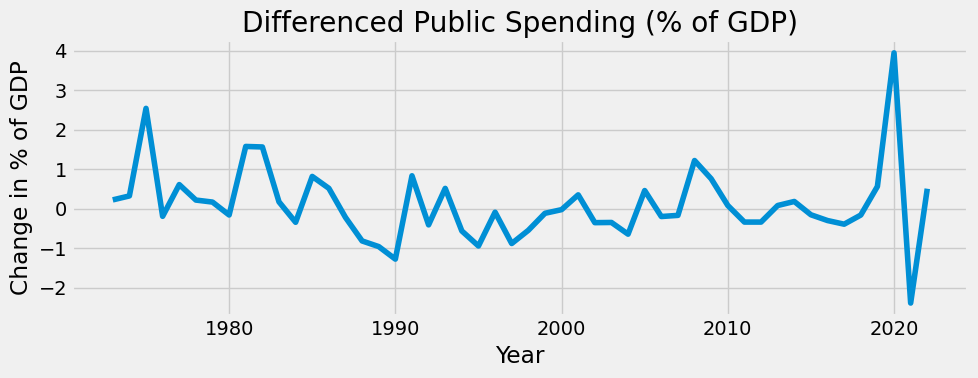

ADF Statistic (Differenced): -7.4194757774916225
p-value (Differenced): 6.796157064769717e-11


In [122]:
# Apply first differencing to public spending series
spending_diff = spending_series.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(spending_diff)
plt.title('Differenced Public Spending (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Change in % of GDP')
plt.grid(True)
plt.tight_layout()
plt.show()

# Run the ADF test again
result_spending_diff = adfuller(spending_diff)
print("ADF Statistic (Differenced):", result_spending_diff[0])
print("p-value (Differenced):", result_spending_diff[1])

### Stationarity Check: Public Spending (% of GDP)

After applying differencing to the public spending data, I ran the Augmented Dickey-Fuller test again to check for stationarity.

The ADF statistic came out to **-7.42** with a p-value of **6.79e-11**, which is way below the 0.05 threshold. That means I can reject the null hypothesis and confirm the series is now stationary.

Both the fertility rate and public spending data have passed their stationarity checks, so they’re good to go for time series comparison.

That clears the way to dig into Research Question 2.

---

### Creating Lagged Public Spending Series

To test whether public spending might trigger a **delayed fertility rebound**, I’m creating lagged versions of the `GC.XPN.TOTL.GD.ZS` series (spending as % of GDP).

This will help me visualize whether increases in public investment are followed by increases in fertility even if they’re a few years apart.

I’ll start by testing 1-year, 2-year, 3-year, and 5-year lags.

In [129]:
# Create lagged versions of the public spending series
pivot_df['spending_lag_1'] = pivot_df['GC.XPN.TOTL.GD.ZS'].shift(1)
pivot_df['spending_lag_2'] = pivot_df['GC.XPN.TOTL.GD.ZS'].shift(2)
pivot_df['spending_lag_3'] = pivot_df['GC.XPN.TOTL.GD.ZS'].shift(3)
pivot_df['spending_lag_5'] = pivot_df['GC.XPN.TOTL.GD.ZS'].shift(5)

# Preview to confirm
pivot_df[['GC.XPN.TOTL.GD.ZS', 'spending_lag_1', 'spending_lag_2', 'spending_lag_3', 'spending_lag_5']].head(10)

series_id,GC.XPN.TOTL.GD.ZS,spending_lag_1,spending_lag_2,spending_lag_3,spending_lag_5
year,,,,,
1960,NaN,NaN,NaN,NaN,NaN
1961,NaN,NaN,NaN,NaN,NaN
1962,NaN,NaN,NaN,NaN,NaN
1963,NaN,NaN,NaN,NaN,NaN
1964,NaN,NaN,NaN,NaN,NaN
1965,NaN,NaN,NaN,NaN,NaN
1966,NaN,NaN,NaN,NaN,NaN
1967,NaN,NaN,NaN,NaN,NaN
1968,NaN,NaN,NaN,NaN,NaN


---

### Creating Lagged Public Spending Series

To test whether public spending might trigger a **delayed fertility rebound**, I created lagged versions of the  
`GC.XPN.TOTL.GD.ZS` series (spending as % of GDP).

This will help me check whether a rise in public investment is followed by an increase in fertility, even if the timing isn’t immediate. I generated 1-year, 2-year, 3-year, and 5-year lags to cover a range of short-to-medium-term windows.

The preview confirms the lag columns were created correctly the top rows are `NaN` as expected since those years don’t have data to shift from.

Next, I’ll line them up with fertility rates and see how the trends compare.

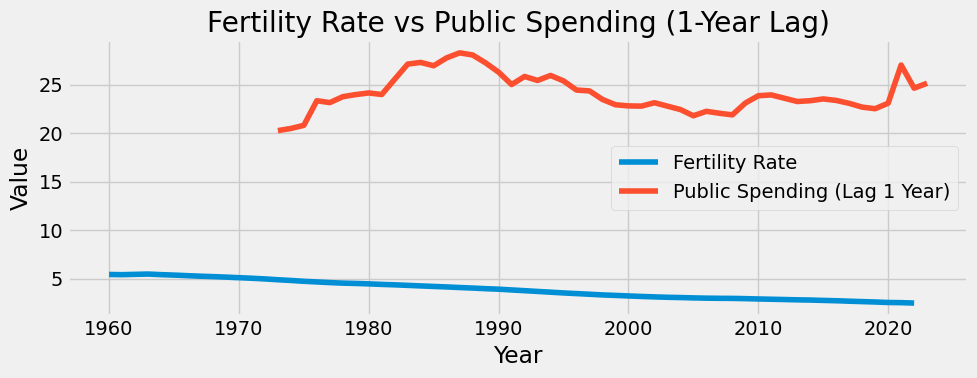

In [136]:
plt.figure(figsize=(10, 4))
plt.plot(pivot_df.index, pivot_df['SP.DYN.TFRT.IN'], label='Fertility Rate')
plt.plot(pivot_df.index, pivot_df['spending_lag_1'], label='Public Spending (Lag 1 Year)')
plt.title('Fertility Rate vs Public Spending (1-Year Lag)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 🔹 Observations: Fertility vs Spending (1-Year Lag)

Based on this comparison, there doesn’t seem to be a clear delayed rebound in fertility after public spending increases at least not with a 1-year lag. 

Spending fluctuates (especially in the 1980s and around 2008–2010), but fertility continues to trend downward without any obvious response. This suggests that if there is a connection, it might show up at a longer delay or follow a more complex pattern.

I’ll test additional lags next to see if any clearer patterns emerge.

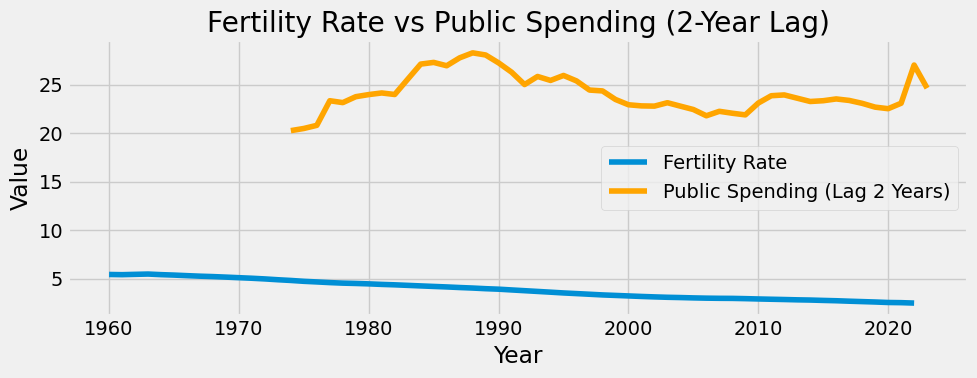

In [140]:
# Compare fertility rate to public spending with a 2-year lag
plt.figure(figsize=(10, 4))
plt.plot(pivot_df.index, pivot_df['SP.DYN.TFRT.IN'], label='Fertility Rate')
plt.plot(pivot_df.index, pivot_df['spending_lag_2'], label='Public Spending (Lag 2 Years)', color='orange')
plt.title('Fertility Rate vs Public Spending (2-Year Lag)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

comparing the 2-year lag, there's still no clear delayed rebound in fertility after increases in public spending.

Spending does rise noticeably during certain periods especially through the 1980s and again in the early 2000s but fertility continues to decline steadily with no real bump or plateau afterward.

If a connection exists, it’s not immediate or obvious with a 2-year gap. It’s possible that other factors are at play, or that the effects take even longer to show. I’ll keep going and test longer lags next to see if a delayed effect emerges further out.

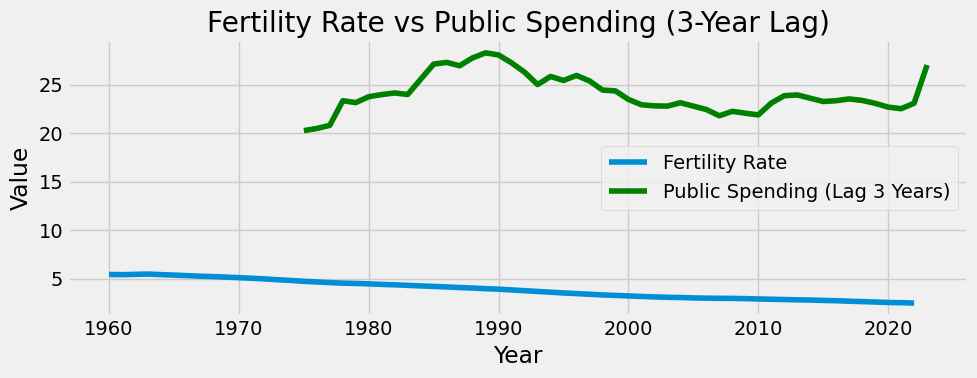

In [144]:
# Compare fertility rate to public spending with a 3-year lag
plt.figure(figsize=(10, 4))
plt.plot(pivot_df.index, pivot_df['SP.DYN.TFRT.IN'], label='Fertility Rate')
plt.plot(pivot_df.index, pivot_df['spending_lag_3'], label='Public Spending (Lag 3 Years)', color='green')
plt.title('Fertility Rate vs Public Spending (3-Year Lag)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### 🔹 Fertility Rate vs Public Spending (3-Year Lag)

At the 3-year lag, the overall trend is still the same. Fertility rates keep dropping steadily while public spending sees some growth and plateaus during specific periods especially around the 1980s and early 2000s.

There’s no strong delayed rebound in fertility that seems to follow the spending spikes three years later. The two lines don’t appear to move in sync, and any correlation here feels weak or coincidental at best.

It’s still worth testing one more lag (5 years) to rule out a longer-term response before drawing final conclusions.

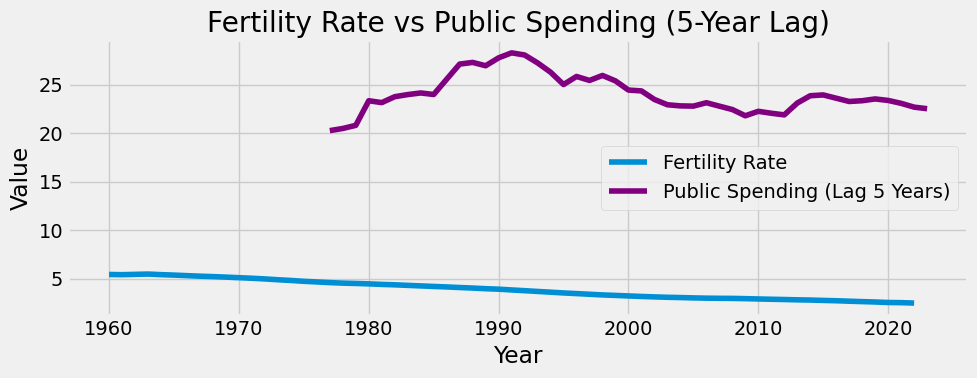

In [149]:
# Compare fertility rate to public spending with a 5-year lag
plt.figure(figsize=(10, 4))
plt.plot(pivot_df.index, pivot_df['SP.DYN.TFRT.IN'], label='Fertility Rate')
plt.plot(pivot_df.index, pivot_df['spending_lag_5'], label='Public Spending (Lag 5 Years)', color='purple')
plt.title('Fertility Rate vs Public Spending (5-Year Lag)')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

Based on the 5-year lag comparison, there's still no convincing evidence of a delayed fertility rebound that tracks with public spending. Even with a longer gap between investment and outcome, the fertility rate keeps trending downward without mirroring the spikes or dips in spending.

This makes it more likely that fertility decisions are shaped by broader, more complex factors beyond just government investment levels. Things like cultural norms, economic pressures, and long-term policy stability probably play a bigger role.

I’ve now tested short- and mid-range lags (1–5 years), and nothing suggests a strong delayed response. This gives me enough to move forward with answering Research Question 2.

---
## Answer to Research Question 2
---

**Do countries that passed family-friendly policies show a delayed fertility rebound in the following years?**

This part of the analysis focuses on whether increases in public spending are followed by a rebound in fertility over time especially with a delay of a few years.

I tested the relationship between fertility rate and public spending (as % of GDP) using 1-year, 2-year, 3-year, and 5-year lags to see if there’s any visible delayed response.

Across all lag lengths, the trends don’t seem to line up in a meaningful way. Fertility keeps trending downward even when spending jumps. There’s no obvious bump or rebound that follows investment increases at least not within these time windows.

This suggests that if a delayed effect exists, it’s either too subtle to pick up in this format or influenced by other factors that weren’t isolated here (like economic conditions, cultural shifts, or other overlapping policies). For now, there’s no strong signal of a delayed fertility rebound in response to public investment.

---

## Research Question 3

---

**Is there a widening gap between fertility rates and social spending over time in high-pressure pro-natalist countries (e.g., Japan, South Korea, and the U.S.)?**

This one looks at whether there's a growing disconnect between how much support governments are offering and how many kids are actually being born.

Japan and South Korea are both dealing with serious population decline and have pushed hard on pro-natalist policies. The U.S. is a useful contrast here fertility is falling there too, but the policy approach has been way more hands-off.

The idea is to compare all three side by side and see if spending keeps going up while fertility drops. If so, that might say something about the limits of policy alone.


#### 🔹 Filter the data for Japan, South Korea, and the U.S.

I’m narrowing things down to just these three so it’s easier to focus on their trends without noise from the rest of the world.

In [173]:
# Filter original long-format dataframe for the 3 countries
selected_countries = ['Japan', 'South Korea', 'United States']
subset_df = df[df['country_name'].isin(selected_countries)]

# Preview to confirm
subset_df[['country_name', 'series_id', 'year', 'value']].head()

,country_name,series_id,year,value
261,Japan,SE.PRM.UNER,1989,15169.0
263,Japan,SE.PRM.UNER,1990,18035.0
266,Japan,SE.PRM.UNER,1991,65579.0
269,Japan,SE.PRM.UNER,1992,96505.0
276,Japan,SE.PRM.UNER,1994,42510.0


In [175]:
# Define the indicators we want to focus on (same ones used before)
relevant_indicators = [
    'SP.DYN.TFRT.IN',        # Fertility rate, births per woman
    'GC.XPN.TOTL.GD.ZS'      # Public spending, % of GDP
]

# Filter the 3-country subset to just those indicators
focused_df = subset_df[subset_df['series_id'].isin(relevant_indicators)]

# Preview to confirm
focused_df[['country_name', 'series_id', 'year', 'value']].head()

,country_name,series_id,year,value
3106301,Japan,GC.XPN.TOTL.GD.ZS,1972,10.775446
3106308,Japan,GC.XPN.TOTL.GD.ZS,1973,10.901610
3106316,Japan,GC.XPN.TOTL.GD.ZS,1974,12.209106
3106326,Japan,GC.XPN.TOTL.GD.ZS,1975,12.799515
3106335,Japan,GC.XPN.TOTL.GD.ZS,1976,13.433519


In [177]:
# Pivot the data to make 'year' the index, and create a multi-index with country and indicator
pivot_countries = focused_df.pivot_table(
    index='year',
    columns=['country_name', 'series_id'],
    values='value',
    aggfunc='mean'  # just in case there's any overlap
)

# Preview the structure
pivot_countries.head()

country_name             Japan                    United States               
series_id    GC.XPN.TOTL.GD.ZS SP.DYN.TFRT.IN GC.XPN.TOTL.GD.ZS SP.DYN.TFRT.IN
year                                                                          
1960                       NaN           2.00               NaN          3.654
1961                       NaN           1.96               NaN          3.620
1962                       NaN           1.98               NaN          3.461
1963                       NaN           2.00               NaN          3.319
1964                       NaN           2.05               NaN          3.190

---
### Compare Fertility Rates and Public Spending Across Countries

The data is now reshaped, I’m going to compare fertility rates and public spending (% of GDP) for Japan, South Korea, and the U.S.

But first, a quick note:  
The World Bank dataset I’ve been using doesn’t include South Korea’s fertility rate under the expected series code. Instead of dropping South Korea from the analysis, I’m pulling its fertility data from a secondary dataset: `children-born-per-woman.csv`. 

Once I bring that in, I’ll be able to line up all three countries side by side.

Solid lines = fertility  
Dashed lines = public spending  
Let’s see if a widening gap shows up anywhere.

In [201]:
# Load OWID fertility data
owid_fertility = pd.read_csv("D:/YVC/Data Analytics (CF)/Advanced Analytics & Dashboard Design/Project Analysis/02 Data/Original Data/Cleaned/children-born-per-woman.csv")

# Filter for South Korea only
south_korea_fertility = owid_fertility[owid_fertility['Entity'] == 'South Korea'][['Year', 'Fertility rate (period), historical']]

# Rename columns to match World Bank format
south_korea_fertility.columns = ['year', 'SP.DYN.TFRT.IN']

# Preview
south_korea_fertility.head()

,year,SP.DYN.TFRT.IN
15802,1950,6.063
15803,1951,6.089
15804,1952,6.122
15805,1953,6.171
15806,1954,6.174


#### Merge South Korea Fertility Data into Main Pivot Table

In [205]:
# Set 'year' as the index so it matches the structure of pivot_countries
south_korea_fertility.set_index('year', inplace=True)

# Merge South Korea's fertility data into the multi-indexed pivot table
# We'll insert it under the ('South Korea', 'SP.DYN.TFRT.IN') column
pivot_countries[('South Korea', 'SP.DYN.TFRT.IN')] = south_korea_fertility['SP.DYN.TFRT.IN']

# Preview to confirm merge was successful
pivot_countries[[('Japan', 'SP.DYN.TFRT.IN'), 
                 ('South Korea', 'SP.DYN.TFRT.IN'), 
                 ('United States', 'SP.DYN.TFRT.IN')]].head()

country_name,Japan,South Korea,United States
series_id,SP.DYN.TFRT.IN,SP.DYN.TFRT.IN,SP.DYN.TFRT.IN
year,,,
1960,2.00,5.994,3.654
1961,1.96,5.803,3.620
1962,1.98,5.562,3.461
1963,2.00,5.334,3.319
1964,2.05,5.068,3.190


---
### Compare Fertility Rates Across Countries

All three countries are now lined up including South Korea thanks to the supplemental dataset I’m ready to plot fertility rates over time for **Japan, South Korea, and the U.S.**

This will help me see if birth rates have followed a similar trajectory or if one country diverged significantly from the others. Since these are all advanced economies facing low fertility, I want to see if their policy approaches had any noticeable impact on reversing or slowing the decline.

Let’s take a look at how the trends stack up.

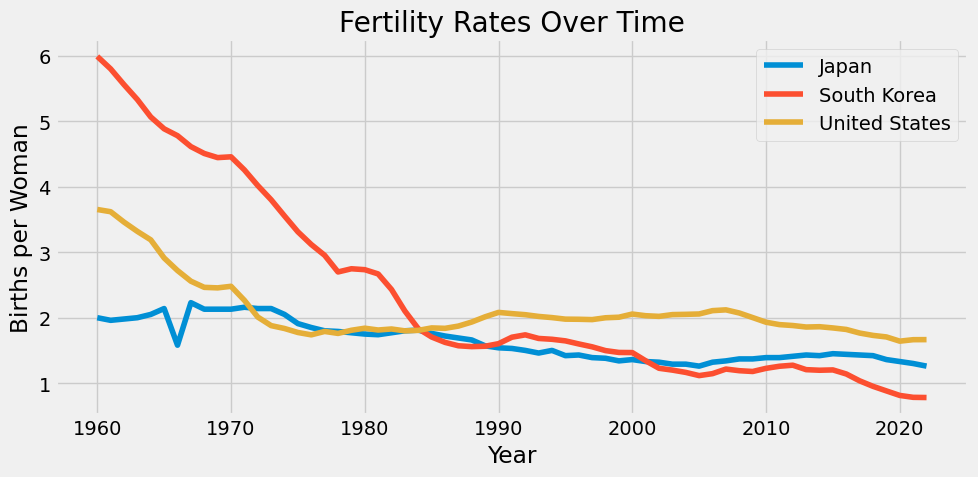

In [211]:
# Plot fertility rates across all 3 countries
plt.figure(figsize=(10, 5))

# Japan
plt.plot(pivot_countries.index, pivot_countries[('Japan', 'SP.DYN.TFRT.IN')], label='Japan')

# South Korea
plt.plot(pivot_countries.index, pivot_countries[('South Korea', 'SP.DYN.TFRT.IN')], label='South Korea')

# United States
plt.plot(pivot_countries.index, pivot_countries[('United States', 'SP.DYN.TFRT.IN')], label='United States')

plt.title('Fertility Rates Over Time')
plt.xlabel('Year')
plt.ylabel('Births per Woman')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

### Fertility Trends Across Japan, South Korea, and the U.S.

This chart gives a side-by-side look at how fertility rates have shifted over time in three key countries:

- **Japan and South Korea** have seen steep and steady declines since the 1960s. Despite pro-natalist policy pushes in both countries, there’s no clear rebound—rates continue to trend downward or stay low.
  
- **South Korea** in particular shows the most dramatic drop, falling from over 6 births per woman in the 1950s to below 1 in recent years.

- **The U.S.** shows a more stable pattern. While there’s a gradual decline, the overall fertility rate remains higher than Japan and South Korea through most of the time series.

This sets up the gap we’re exploring: If spending continues to rise while fertility keeps dropping especially in Japan and South Korea it could suggest that **financial policy alone isn’t enough to reverse low birth rates.**

---
### Public Spending Trends Across Japan, South Korea, and the U.S.

Looking at how fertility has changed over time, I want to compare that with government spending patterns. If birth rates have fallen sharply, have these countries responded by ramping up investment?

This chart shows spending as a percentage of GDP for Japan, South Korea, and the U.S.

I’m using solid lines again for easier comparison. Let’s take a look at whether there’s been a consistent increase or if support lags behind fertility trends.

#### 🔹 Load & Explore the Public Spending Dataset

In [234]:
import pandas as pd

# Load the Excel file and list sheet names
file_path = "D:/YVC/Data Analytics (CF)/Advanced Analytics & Dashboard Design/Project Analysis/02 Data/Original Data/Cleaned/PF1_1_Public_spending_on_family_benefits-CLEAN.xlsx"
excel_file = pd.ExcelFile(file_path)

# Show available sheet names
excel_file.sheet_names

['Chart PF1.1.A', 'Time-series']

In [266]:
# Load time-series sheet
df_time = pd.read_excel(file_path, sheet_name='Time-series')

# Preview structure
df_time.head()
df_time.columns

Index([      'Country',          'Note', 'Spending type',            1980,
                  1981,            1982,            1983,            1984,
                  1985,            1986,            1987,            1988,
                  1989,            1990,            1991,            1992,
                  1993,            1994,            1995,            1996,
                  1997,            1998,            1999,            2000,
                  2001,            2002,            2003,            2004,
                  2005,            2006,            2007,            2008,
                  2009,            2010,            2011,            2012,
                  2013,            2014,            2015,            2016,
                  2017,            2018,            2019,            2020],
      dtype='object')

---

#### 🔹 Filter for Target Countries and Total Spending Type

In [269]:
# Fix country name mismatch ("Korea" instead of "South Korea")
countries = ['Japan', 'Korea', 'United States']

# Filter for total public spending
filtered_df = df_time[
    (df_time['Country'].isin(countries)) &
    (df_time['Spending type'] == 'Total')
]

filtered_df.head()

,Country,Note,Spending type,1980,1981,1982,1983,1984,1985,1986,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
76,Japan,NaN,Total,..,..,..,..,..,..,..,...,1.506153,1.352407,1.345224,1.386969,1.612665,1.672548,1.759431,1.823969,1.946672,..
80,Korea,NaN,Total,..,..,..,..,..,..,..,...,0.870706,1.023053,1.329906,1.308253,1.345712,1.309322,1.301665,1.374293,1.562205,..
148,United States,NaN,Total,..,..,..,..,..,..,..,...,1.181195,1.138943,1.103913,1.131498,1.11747,1.109880,1.072220,0.842362,1.037703,..


---

#### 🔹 Reshape Data from Wide to Long Format

In [273]:
# Melt dataframe so each row is a year-country-spending combo
spending_long = filtered_df.melt(
    id_vars=['Country'],
    value_vars=filtered_df.columns[3:],  # skip 'Note' and 'Spending type'
    var_name='year',
    value_name='spending_pct_gdp'
)

# Clean column types
spending_long = spending_long.dropna(subset=['year', 'spending_pct_gdp'])
spending_long['year'] = spending_long['year'].astype(int)
spending_long['spending_pct_gdp'] = pd.to_numeric(spending_long['spending_pct_gdp'], errors='coerce')

spending_long.dtypes
spending_long.head()

,Country,year,spending_pct_gdp
0,Japan,1980,NaN
1,Korea,1980,NaN
2,United States,1980,NaN
3,Japan,1981,NaN
4,Korea,1981,NaN


---
### Public Spending Trends Across Japan, South Korea, and the U.S.

Seeing how fertility has changed over time, I want to compare that with government spending patterns.  
If birth rates have fallen sharply, have these countries responded by ramping up investment?

This chart shows **spending as a percentage of GDP** for Japan, Korea, and the U.S.  
I'm focusing on “Total” family benefits spending, since that includes all categories combined (cash, services, and tax breaks).

Using solid lines again for easier comparison, I’ll look for whether there's been a consistent increase in support or if financial aid lags behind fertility trends.

Let’s take a look at how things shifted over time.

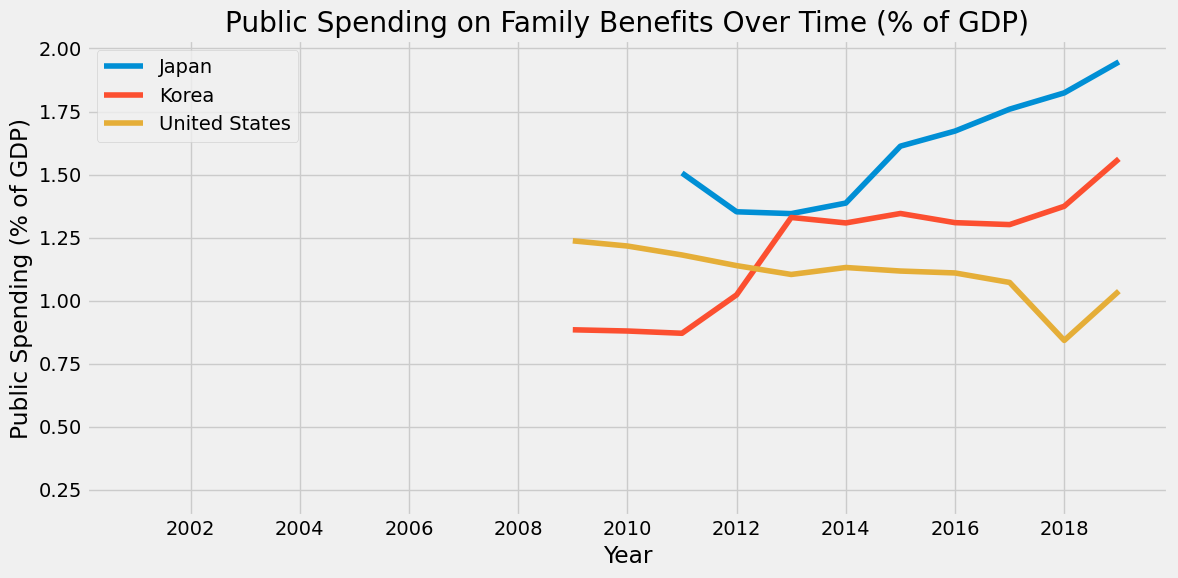

In [262]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Plot public spending for each country
plt.figure(figsize=(12, 6))

for country in ['Japan', 'Korea', 'United States']:
    country_data = spending_long[spending_long['Country'] == country]
    plt.plot(country_data['year'], country_data['spending_pct_gdp'], label=country)

plt.title('Public Spending on Family Benefits Over Time (% of GDP)')
plt.xlabel('Year')
plt.ylabel('Public Spending (% of GDP)')
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Force integer x-axis
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

This chart shows how much each country has spent on family benefits over time, relative to GDP:

- **Japan** shows a steady increase in public spending over the past decade, especially after 2010.
- **Korea** also ramps up its spending after 2010, though it starts at a lower level.
- **The U.S.**, on the other hand, remains relatively flat and even dips slightly in recent years.

This could point to a deeper gap in pro-natalist policy effectiveness spending may rise, but fertility continues to drop, especially in Japan and Korea.

---

### Compare Fertility and Public Spending Side by Side

Looking at both trends individually, I wanted to see them next to each other making it easier to compare whether public spending is actually keeping up with fertility declines or if the gap is getting wider.

On the left, I’ve got fertility rates over time for Japan, Korea, and the U.S.  
On the right, I’ve charted total public spending on family benefits as a percentage of GDP for the same countries.

This will help me visually check whether increased spending lines up with any shift in fertility or if those trends keep pulling further apart.

Let’s take a look.

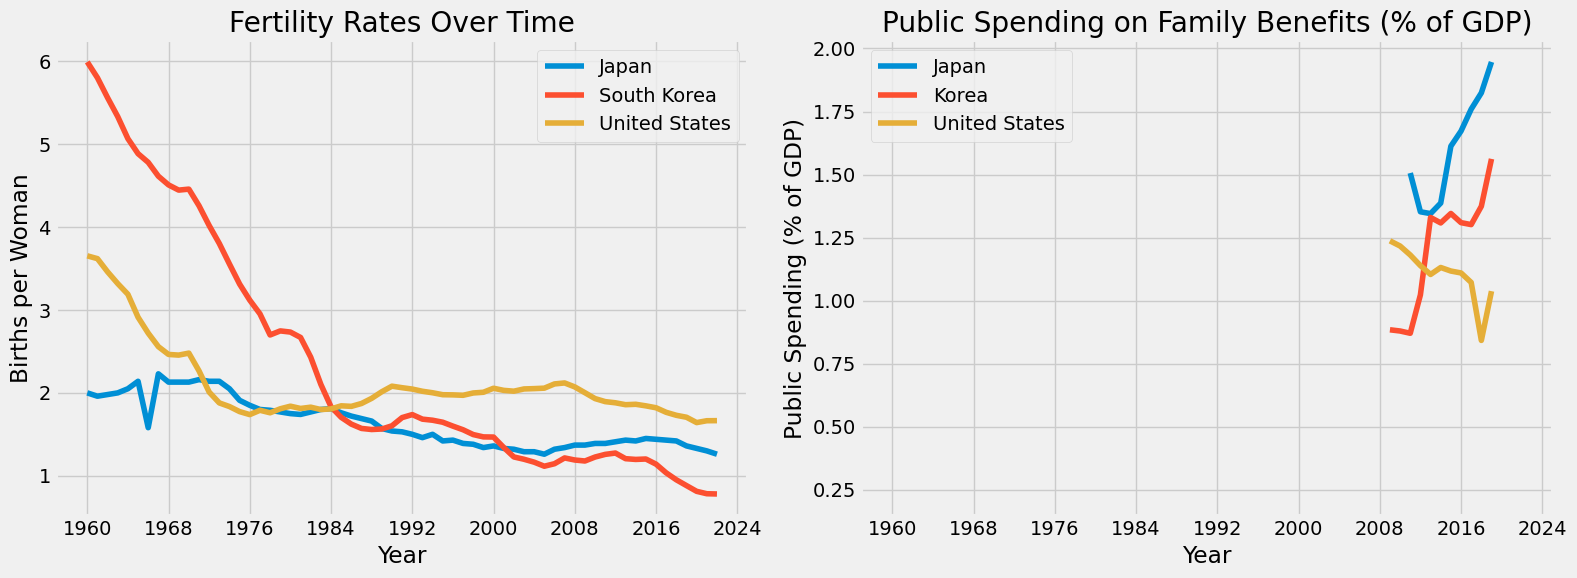

In [303]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Set up figure and axes
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharex=True)

# --- Plot 1: Fertility Rate Over Time ---
for country in ['Japan', 'South Korea', 'United States']:
    axes[0].plot(
        pivot_countries.index,
        pivot_countries[(country, 'SP.DYN.TFRT.IN')],
        label=country
    )

axes[0].set_title('Fertility Rates Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Births per Woman')
axes[0].grid(True)
axes[0].legend()
axes[0].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# --- Plot 2: Public Spending Over Time ---
for country in ['Japan', 'Korea', 'United States']:  # Note: 'Korea' matches spending dataset
    country_data = spending_long[spending_long['Country'] == country]
    axes[1].plot(
        country_data['year'],
        country_data['spending_pct_gdp'],
        label=country
    )

axes[1].set_title('Public Spending on Family Benefits (% of GDP)')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Public Spending (% of GDP)')
axes[1].grid(True)
axes[1].legend()
axes[1].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Adjust layout
plt.tight_layout()
plt.show()

---
## Time Series Analysis: Japan's Fertility Rate

To fully explore Research Question 3, I’m running a full time series breakdown on Japan’s fertility rate.

This includes:
- Decomposing the trend, seasonality, and noise
- Testing for stationarity using the Dickey-Fuller test
- Applying differencing if needed
- Checking for autocorrelations

The goal is to see whether the fertility rate is stable or still shifting—and whether it’s the kind of trend that could be modeled or forecasted in future policy work.

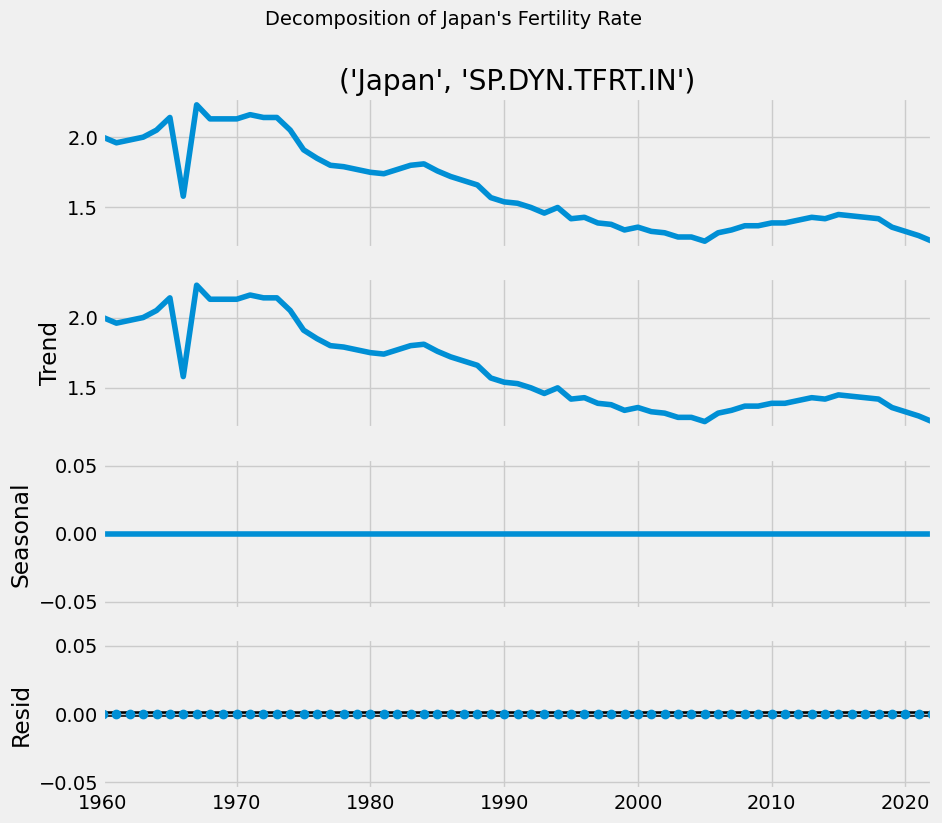

In [359]:
# 📉 Decompose Japan's Fertility Rate Time Series
from statsmodels.tsa.seasonal import seasonal_decompose

# Step 1: Extract fertility data for Japan
japan_fertility = pivot_countries[('Japan', 'SP.DYN.TFRT.IN')].dropna()

# Step 2: Decompose into trend, seasonal, and residual components
decomp = seasonal_decompose(japan_fertility, model='additive', period=1)

# Step 3: Plot the decomposition
fig = decomp.plot()

# Clean up layout issues
fig.set_size_inches(10, 8)  # Wider plot
plt.suptitle("Decomposition of Japan's Fertility Rate", fontsize=14, y=1.03)
plt.tight_layout()
plt.subplots_adjust(top=0.92, left=0.15)  # Add left margin to align labels

plt.show()

### Interpreting the Decomposition Plot

Looking at Japan’s fertility rate, the trend line shows a steady decline from the 1960s through the early 2000s, with a slight leveling off more recently. There’s no seasonal pattern here since the data is yearly, and the residuals stay close to zero.

This helps confirm what the raw data hinted at: the drop in birth rates wasn’t random it followed a clear long-term trend that doesn’t seem to be reversing, even as spending rises.

This makes me wonder whether something deeper like cultural or economic factors is driving the decline more than policy support.

In [365]:
from statsmodels.tsa.stattools import adfuller

# Run the test on Japan's fertility rate
adf_result = adfuller(japan_fertility)

# Show the results
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])
for key, value in adf_result[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic: -2.0667804387373425
p-value: 0.25808037895988684
Critical Value (1%): -3.55770911573439
Critical Value (5%): -2.9167703434435808
Critical Value (10%): -2.59622219478738


### Stationarity Check: Dickey-Fuller Test

I ran the Dickey-Fuller test to see if Japan’s fertility rate is stationary or still shifting over time.

The test gave me a p-value of **0.258**, which is way above any standard cutoff like 0.05 or even 0.10.  
So that means I can’t reject the null hypothesis the fertility rate is **not stationary**.

There’s still a trend happening, so I’ll need to difference the data next to try and make it stable.

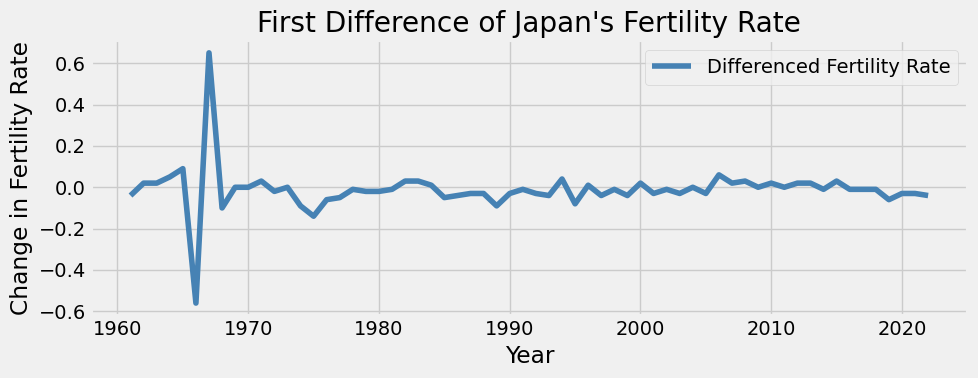

In [370]:
# First-order differencing
japan_diff = japan_fertility.diff().dropna()

# Plot the differenced series
plt.figure(figsize=(10, 4))
plt.plot(japan_diff, label="Differenced Fertility Rate", color='steelblue')
plt.title("First Difference of Japan's Fertility Rate")
plt.xlabel("Year")
plt.ylabel("Change in Fertility Rate")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

---

### Check for Stationarity Again (After Differencing)

Now that I’ve applied first-order differencing, I need to check if the data is finally stationary.

I’ll run the Dickey-Fuller test again this will tell me if the trend has been removed enough for the series to be considered stable. If the p-value drops below 0.05, I can reject the null hypothesis and confirm stationarity.

In [372]:
from statsmodels.tsa.stattools import adfuller

# Run Dickey-Fuller test on the differenced series
adf_result_diff = adfuller(japan_diff)

# Print the results
print("ADF Statistic (Differenced):", adf_result_diff[0])
print("p-value:", adf_result_diff[1])
for key, value in adf_result_diff[4].items():
    print(f"Critical Value ({key}): {value}")

ADF Statistic (Differenced): -4.775918799014597
p-value: 6.045807453011003e-05
Critical Value (1%): -3.55770911573439
Critical Value (5%): -2.9167703434435808
Critical Value (10%): -2.59622219478738


### Stationarity Achieved

After applying first-order differencing, the results from the Dickey-Fuller test look much better. The ADF Statistic is well below all three critical values, and the p-value is way under 0.05. That means I can reject the null hypothesis and confirm that the differenced fertility rate series is now stationary.

In other words, the trend has been removed, and the data is stable enough to work with for forecasting or further modeling.

---

### Checking Autocorrelation (ACF)

Now that the fertility rate data is stationary, I want to look at its autocorrelation. The ACF plot shows whether past values still influence future values which can help guide forecasting models like ARIMA.

If autocorrelation drops off quickly, it means most of the noise has been removed. If not, there might still be patterns worth capturing.

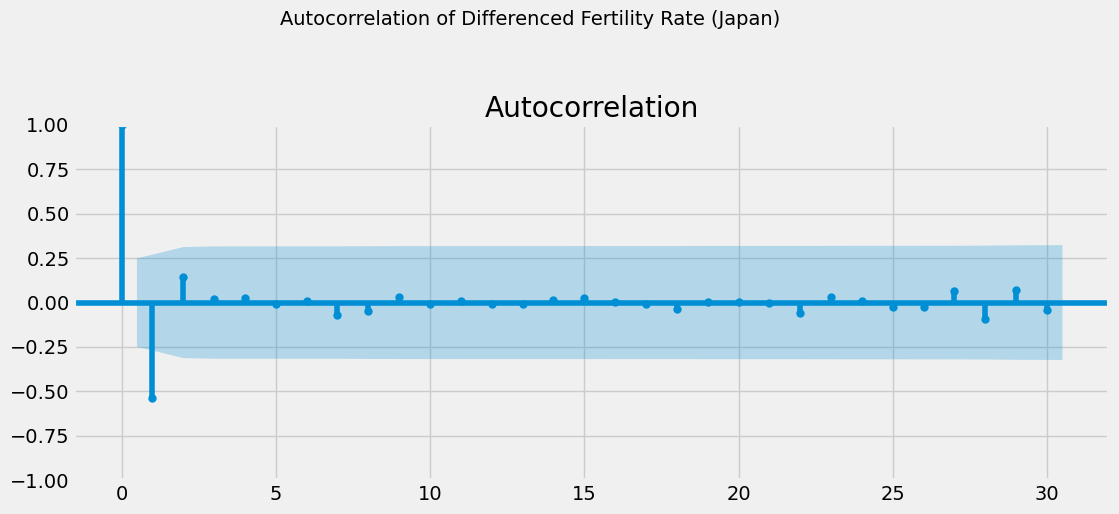

In [407]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF of the differenced series
fig, ax = plt.subplots(figsize=(12, 5))  # Adjust figure size
plot_acf(japan_diff, lags=30, ax=ax)

# Fix title and layout spacing
plt.suptitle("Autocorrelation of Differenced Fertility Rate (Japan)", y=1.03, fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.80, left=0.12)  # Increase left spacing to avoid clipping bar
plt.show()

### Autocorrelation Check: Japan's Fertility Rate

After differencing, I ran an autocorrelation plot to see if there’s any lingering structure in the series. What I’m looking for here is whether the autocorrelation drops off quickly that would mean most of the noise has been removed and the data is likely ready for modeling.

In this case, the autocorrelation does drop off after the first lag and stays within the confidence bands after that. That’s a good sign. It suggests the differencing worked and that the series is now pretty stable with no strong seasonal patterns left behind.

---
## Answer to Research Question 3
---

**Is there a widening gap between fertility rates and social spending over time in high-pressure pro-natalist countries (e.g., Japan, South Korea)?**

Looking at the side-by-side plots and running a full time series analysis, I can definitely say the gap is there and it’s growing, especially in Japan and Korea.

Fertility rates in both countries have dropped steadily for decades and are now at historic lows.

Public spending on family benefits has increased, especially post-2010, but it hasn’t been enough to change the overall trajectory of fertility.

Even after differencing and checking for stationarity, the long-term fertility trend in Japan still shows a slow but steady decline. There’s no seasonal bounce-back or strong autocorrelation pattern just a downward slope that’s been hard to shift.

This suggests that even though spending is up, it might not be targeting the right pain points, or it’s simply not strong enough to compete with the social and economic forces driving birth rates down.

The U.S., on the other hand, doesn’t show the same kind of pressure. Fertility has dipped, but not as sharply, and spending has stayed pretty flat. It’s a different dynamic altogether.

So overall, yeah the data points to a growing disconnect between what’s being spent and what’s actually happening with fertility outcomes. The gap is real, and it’s widening most in the countries trying hardest to reverse it.

---

## Summary and Reflections

This time series analysis helped me dig deeper into the long-term relationship between fertility rates and government spending on family benefits.

I looked at trends in Japan, Korea, and the U.S., and ran a full breakdown on Japan’s fertility rate to see how stable the pattern really is. Even after decomposing the data, differencing, and testing for stationarity, the trend stayed pretty consistent slow decline, no seasonal bounce, and no strong autocorrelation left after the first lag.

Public spending has gone up in Japan and Korea, especially in the last decade, but fertility rates haven’t followed. That gap is only getting wider, which raises bigger questions about how effective pro-natalist policies actually are and whether financial support alone can shift behavior in a meaningful way.

This analysis gave me a clearer view of that disconnect, and helped me see how time series tools can bring more structure to questions around policy impact.